In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
corona=pd.read_csv('corona.csv')

In [3]:
corona

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
corona['Country']=le.fit_transform(corona['Country'])
corona

NameError: name 'le' is not defined

In [5]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23688 entries, 0 to 23687
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       23688 non-null  object
 1   Country    23688 non-null  object
 2   Confirmed  23688 non-null  int64 
 3   Recovered  23688 non-null  int64 
 4   Deaths     23688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 925.4+ KB


In [6]:
corona.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


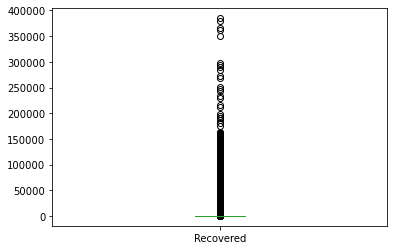

In [7]:
corona['Recovered'].plot.box()

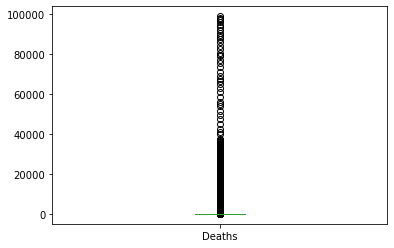

In [8]:
corona['Deaths'].plot.box()

Confirmed       AxesSubplot(0.125,0.125;0.168478x0.755)
Recovered    AxesSubplot(0.327174,0.125;0.168478x0.755)
Deaths       AxesSubplot(0.529348,0.125;0.168478x0.755)
dtype: object

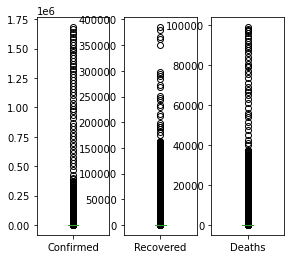

In [9]:
corona.plot(kind='box',subplots=True, layout=(1,4))

In [10]:
corona.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

   Confirmed  Recovered    Deaths
0   0.003104   0.631425  0.223624
1   0.831880   0.151511  0.622853
2   0.595057   0.909482  0.962371
3   0.817459   0.433445  0.590765
4   0.134197   0.775774  0.924740
5   0.926153   0.420331  0.800980
6   0.099285   0.390563  0.026191
7   0.243545   0.300410  0.962043
8   0.104155   0.988178  0.274260
9   0.149653   0.990631  0.290404


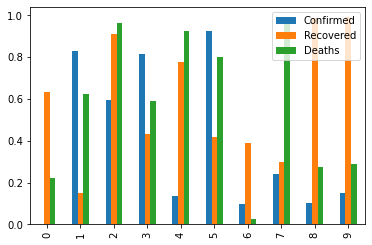

In [12]:
corona=pd.DataFrame(np.random.rand(10,3),columns=['Confirmed','Recovered','Deaths'])
print(corona)
corona.plot.bar()

In [13]:
corona.isnull().sum()

Confirmed    0
Recovered    0
Deaths       0
dtype: int64

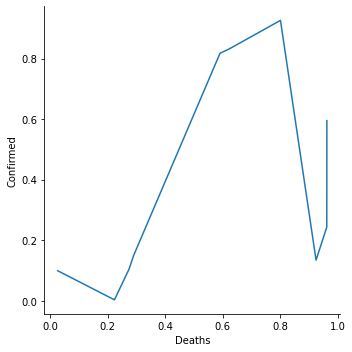

In [14]:
sns.relplot(x='Deaths', y='Confirmed' , kind='line', data=corona)

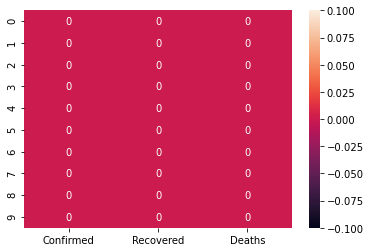

In [15]:
import seaborn as sns
sns.heatmap(corona.isnull(),annot=True)
plt.show()

In [16]:
from scipy.stats import zscore
z_score=abs(zscore(corona))
print(corona.shape)
corona_final=corona.loc[(z_score<3).all(axis=1)]
print(corona_final.shape)

(10, 3)
(10, 3)


In [17]:
x=corona[['Confirmed']]
y=corona[['Deaths']]

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

In [19]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test, y_train,y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
    regr= linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print ('r2_score corresponding to random state: ',r_state,' is:',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_score
        final_r_state=r_state
print()
print()
print('max r2 score is corresponding to',final_r_state,'is: ',max_r_score)

r2_score corresponding to random state:  42  is: -0.2628106963890584
r2_score corresponding to random state:  43  is: -1.1044538981167933
r2_score corresponding to random state:  44  is: -8663067.49117689
r2_score corresponding to random state:  45  is: -695.4984359976877
r2_score corresponding to random state:  46  is: 0.019442011900005607
r2_score corresponding to random state:  47  is: -1.073649726037722


TypeError: '>' not supported between instances of 'float' and 'function'

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x,y, cv=5, scoring='r2').mean()

-189.04681910572398

In [21]:
x_train, x_test , y_train, y_test =train_test_split(x,y, random_state = 50, test_size= 0.20)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('r2 score is:' ,r2_score(y_test,y_pred))
print ('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is: -0.1354164686543926
RMSE is:  0.3664366615604561


In [25]:
from sklearn.externals import joblib
joblib.dump(lr,'lr_corona.pkl')

ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\ans025\Anaconda3\lib\site-packages\sklearn\externals\__init__.py)